In [7]:
import sys
sys.path.append("../src")

from dataset import ImageDataset, LABEL_DIC

import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
from tqdm import tqdm

DATA_PATH = "../imagenette"
DATA_SUMMARY = "noisy_imagenette.csv"

In [8]:
pd.read_csv(osp.join(DATA_PATH, DATA_SUMMARY)).head()

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
0,train/n02979186/n02979186_9036.JPEG,n02979186,n02979186,n02979186,n02979186,n02979186,False
1,train/n02979186/n02979186_11957.JPEG,n02979186,n02979186,n02979186,n02979186,n03000684,False
2,train/n02979186/n02979186_9715.JPEG,n02979186,n02979186,n02979186,n03417042,n03000684,False
3,train/n02979186/n02979186_21736.JPEG,n02979186,n02979186,n02979186,n02979186,n03417042,False
4,train/n02979186/ILSVRC2012_val_00046953.JPEG,n02979186,n02979186,n02979186,n02979186,n03394916,False


In [9]:
pd.read_csv(osp.join(DATA_PATH, DATA_SUMMARY)).tail()

,path,noisy_labels_0,noisy_labels_1,noisy_labels_5,noisy_labels_25,noisy_labels_50,is_valid
13389,val/n03425413/n03425413_17521.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True
13390,val/n03425413/n03425413_20711.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True
13391,val/n03425413/n03425413_19050.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True
13392,val/n03425413/n03425413_13831.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True
13393,val/n03425413/n03425413_1242.JPEG,n03425413,n03425413,n03425413,n03425413,n03425413,True


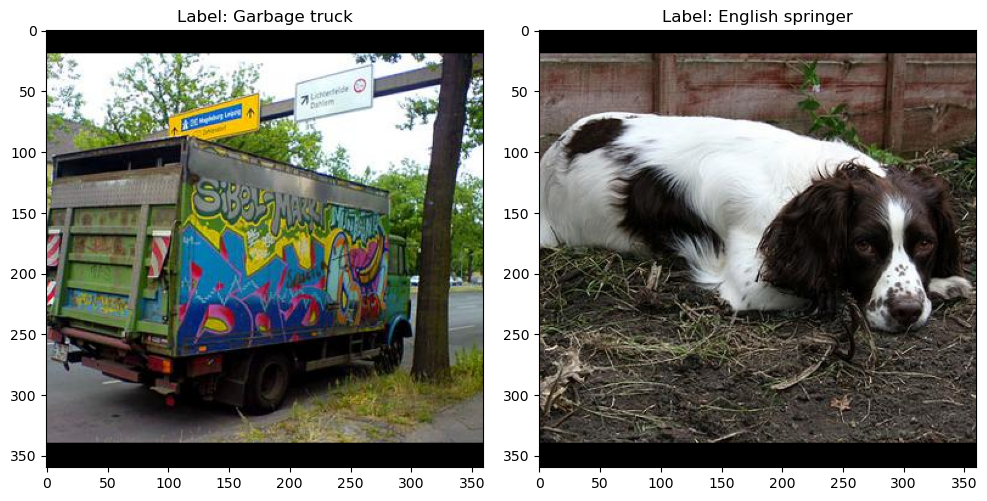

In [11]:
transform = transforms.Compose([transforms.CenterCrop(360), transforms.ToTensor()])

train_dataset = ImageDataset(osp.join(DATA_PATH, DATA_SUMMARY), transform, False)
val_dataset = ImageDataset(osp.join(DATA_PATH, DATA_SUMMARY), transform, True)

toy_image_1, toy_label_1 = train_dataset[1500]
toy_image_2, toy_label_2 = train_dataset[3000]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.transpose(toy_image_1.numpy(), (1, 2, 0)))
axs[0].set_title(f"Label: {LABEL_DIC[toy_label_1]}")

axs[1].imshow(np.transpose(toy_image_2.numpy(), (1, 2, 0)))
axs[1].set_title(f"Label: {LABEL_DIC[toy_label_2]}")

plt.tight_layout()
plt.show()

In [5]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False)

for images, labels in tqdm(train_dataloader):
    continue

for images, labels in tqdm(val_dataloader):
    continue

100%|██████████| 246/246 [00:32<00:00,  7.57it/s]
